# Detecting volcanos on Venus from using satellite imagery 

## 1. Prepare problem

In [99]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
seed = 28

In [6]:
# Load dataset
#data_train_imgs = pd.read_csv("data/train_images.csv", header=None)
#data_train_labels = pd.read_csv("data/train_labels.csv")
#data_test_imgs = pd.read_csv("data/test_images.csv", header=None)
#data_test_labels = pd.read_csv("data/test_labels.csv")

data_train_imgs = pd.read_csv("/floyd/input/volcanoes_venus/train_images.csv", header=None)
data_train_labels = pd.read_csv("/floyd/input/volcanoes_venus/train_labels.csv")
data_test_imgs = pd.read_csv("/floyd/input/volcanoes_venus/test_images.csv", header=None)
data_test_labels = pd.read_csv("/floyd/input/volcanoes_venus/test_labels.csv")

## 2. Summarize data

### Descriptive statisitcs

In [10]:
# Head of training images
data_train_imgs.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [45]:
# Head of training labels
data_test_labels.head(n=5)

,Volcano?,Type,Radius,Number Volcanoes
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,1,1.0,17.00,1.0
3,0,NaN,NaN,NaN
4,1,3.0,15.13,1.0


In [7]:
# Shape
print("Train images data: Rows: {}, Columns: {}".format(data_train_imgs.shape[0], data_train_imgs.shape[1]))
print("Train labels data: Rows: {}, Columns: {}".format(data_train_labels.shape[0], data_train_labels.shape[1]))
print("Test images data: Rows: {}, Columns: {}".format(data_test_imgs.shape[0], data_test_imgs.shape[1]))
print("Test labels data: Rows: {}, Columns: {}".format(data_test_labels.shape[0], data_test_labels.shape[1]))

Train images data: Rows: 7000, Columns: 12100
Train labels data: Rows: 7000, Columns: 4
Test images data: Rows: 2734, Columns: 12100
Test labels data: Rows: 2734, Columns: 4


In [13]:
# Data info/types of training images
data_train_imgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Columns: 12100 entries, 0 to 12099
dtypes: int64(12100)
memory usage: 646.2 MB


In [22]:
# Data info/types of testing images
data_test_imgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Columns: 12100 entries, 0 to 12099
dtypes: int64(12100)
memory usage: 252.4 MB


In [15]:
# Data info/types of training labels
data_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
Volcano?            7000 non-null int64
Type                1000 non-null float64
Radius              1000 non-null float64
Number Volcanoes    1000 non-null float64
dtypes: float64(3), int64(1)
memory usage: 218.8 KB


In [23]:
# Data info/types of training labels
data_test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 4 columns):
Volcano?            2734 non-null int64
Type                434 non-null float64
Radius              434 non-null float64
Number Volcanoes    434 non-null float64
dtypes: float64(3), int64(1)
memory usage: 85.5 KB


In [18]:
# Missing values in training images
np.sum(data_train_imgs.isna().sum())

0

In [24]:
# Missing values in test images
np.sum(data_test_imgs.isna().sum())

0

In [21]:
# Missing values in training labels
data_train_labels.isna().sum()

Volcano?               0
Type                6000
Radius              6000
Number Volcanoes    6000
dtype: int64

In [26]:
# Missing values in test labels
data_test_labels.isna().sum()

Volcano?               0
Type                2300
Radius              2300
Number Volcanoes    2300
dtype: int64

In [33]:
# Class distribution in training data
class_distribution_train = data_train_labels.groupby("Volcano?").size()
print(class_distribution_train)

print()
print("Class 0:", class_distribution_train[0] / np.sum(class_distribution_train))
print("Class 1:", class_distribution_train[1] / np.sum(class_distribution_train))

Volcano?
0    6000
1    1000
dtype: int64

Class 0: 0.8571428571428571
Class 1: 0.14285714285714285


In [34]:
# Class distribution in test data
class_distribution_test = data_test_labels.groupby("Volcano?").size()
print(class_distribution_test)

print()
print("Class 0:", class_distribution_test[0] / np.sum(class_distribution_test))
print("Class 1:", class_distribution_test[1] / np.sum(class_distribution_test))

Volcano?
0    2300
1     434
dtype: int64

Class 0: 0.8412582297000731
Class 1: 0.15874177029992684


In [35]:
# Describe train data
data_train_imgs.describe()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,99.983857,99.980571,100.013429,99.974143,100.08000,100.171286,100.059571,100.187143,100.552286,100.494286,...,100.252714,100.528286,100.589286,100.386000,100.286429,100.332429,100.437286,100.492143,100.145857,100.032143
std,26.499896,26.414896,26.408002,26.439919,26.51432,26.512484,26.631280,26.506073,26.457947,26.677367,...,25.473316,25.447919,25.308967,25.185476,25.096433,25.303697,25.401405,25.313594,25.119432,25.175735
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
50%,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,100.000000,100.000000,101.000000,101.000000,100.000000,100.000000
75%,115.000000,115.000000,115.000000,115.000000,115.00000,115.000000,115.000000,115.000000,116.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,114.000000,114.000000
max,190.000000,186.000000,186.000000,188.000000,192.00000,191.000000,197.000000,202.000000,202.000000,196.000000,...,199.000000,190.000000,184.000000,180.000000,182.000000,177.000000,182.000000,185.000000,179.000000,181.000000


In [42]:
# Perhaps more useful description
flat_train_imgs = data_train_imgs.values.flatten()
flat_test_imgs = data_test_imgs.values.flatten()

print("Train images data:Count\nMin: {}\nMax: {}".format(np.min(flat_train_imgs), np.max(np.max(flat_train_imgs))))
print("\nTest images data:\nMin: {}\nMax: {}".format(np.min(flat_test_imgs), np.max(np.max(flat_test_imgs))))

Train images data:Count
Min: 0
Max: 234

Test images data:
Min: 0
Max: 234


In [43]:
# Describe train labels 
data_train_labels.describe()

,Volcano?,Type,Radius,Number Volcanoes
count,7000.000000,1000.000000,1000.000000,1000.000000
mean,0.142857,2.965000,16.257650,1.236000
std,0.349952,0.984248,11.632887,0.553724
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,5.830000,1.000000
50%,0.000000,3.000000,14.870000,1.000000
75%,0.000000,4.000000,23.555001,1.000000
max,1.000000,4.000000,87.660000,5.000000


In [44]:
# Describe test labels 
data_test_labels.describe()

,Volcano?,Type,Radius,Number Volcanoes
count,2734.000000,434.000000,434.000000,434.000000
mean,0.158742,3.011521,15.444977,1.200461
std,0.365502,0.950194,11.144196,0.464837
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,2.000000,5.660000,1.000000
50%,0.000000,3.000000,13.745000,1.000000
75%,0.000000,4.000000,22.442500,1.000000
max,1.000000,4.000000,80.280000,3.000000


### Data visualizations

In [54]:
def make_volcano_pic_array(pic_record):
    return np.array(pic_record).reshape(110, 110)

Volcano examples:


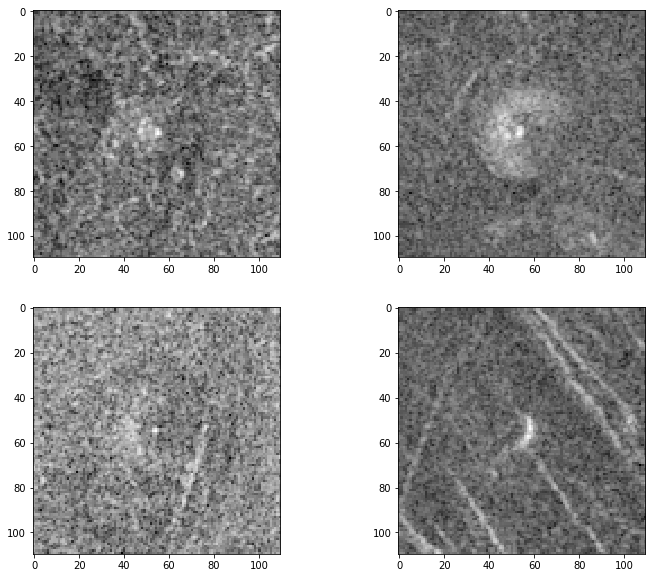

In [67]:
volcanos = data_train_labels[data_train_labels["Volcano?"] == 1].head(n=4).index

print("Volcano examples:")
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12, 10)
axes[0,0].imshow(make_volcano_pic_array(data_train_imgs.iloc[volcanos[0]]), cmap="gray")
axes[0,1].imshow(make_volcano_pic_array(data_train_imgs.iloc[volcanos[1]]), cmap="gray")
axes[1,0].imshow(make_volcano_pic_array(data_train_imgs.iloc[volcanos[2]]), cmap="gray")
axes[1,1].imshow(make_volcano_pic_array(data_train_imgs.iloc[volcanos[3]]), cmap="gray")
plt.show()

No volcano examples:


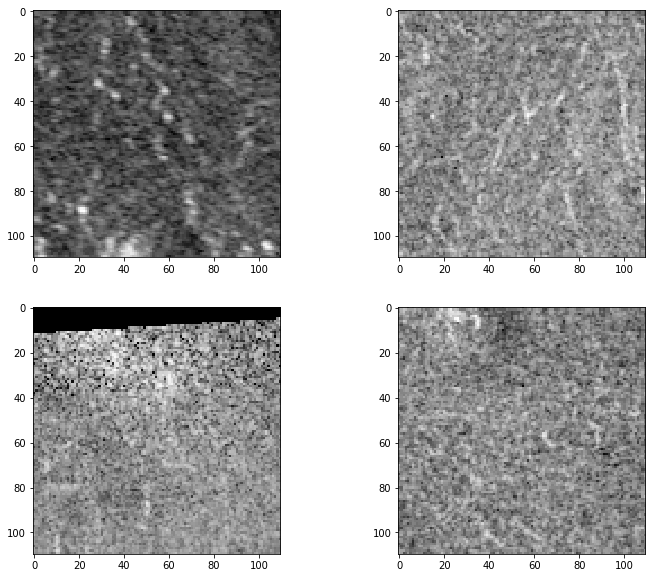

In [68]:
no_volcanos = data_train_labels[data_train_labels["Volcano?"] == 0].head(n=4).index

print("No volcano examples:")
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12, 10)
axes[0,0].imshow(make_volcano_pic_array(data_train_imgs.iloc[no_volcanos[0]]), cmap="gray")
axes[0,1].imshow(make_volcano_pic_array(data_train_imgs.iloc[no_volcanos[1]]), cmap="gray")
axes[1,0].imshow(make_volcano_pic_array(data_train_imgs.iloc[no_volcanos[2]]), cmap="gray")
axes[1,1].imshow(make_volcano_pic_array(data_train_imgs.iloc[no_volcanos[3]]), cmap="gray")
plt.show()

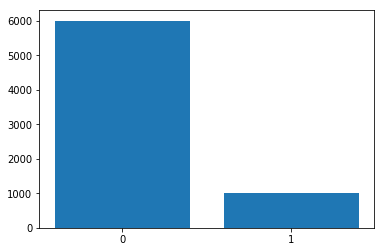

In [87]:
class_counts = data_train_labels["Volcano?"].value_counts()
fig, ax = plt.subplots()
ax.bar([str(cato) for cato in class_counts.index], class_counts.values)
plt.show()

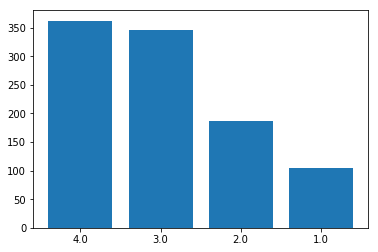

In [83]:
type_counts = data_train_labels["Type"].value_counts()
fig, ax = plt.subplots()
ax.bar([str(cato) for cato in type_counts.index], type_counts.values)
plt.show()

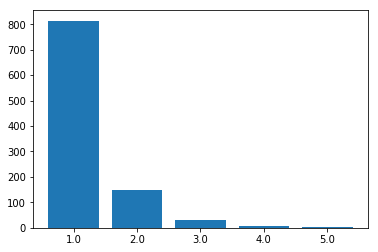

In [85]:
num_of_counts = data_train_labels["Number Volcanoes"].value_counts()
fig, ax = plt.subplots()
ax.bar([str(cato) for cato in num_of_counts.index], num_of_counts.values)
plt.show()

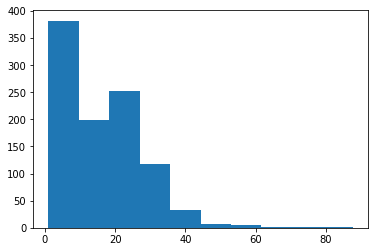

In [86]:
fig, ax = plt.subplots()
ax.hist(data_train_labels["Radius"])
plt.show()

## 3. Prepare data 

In [90]:
# Create numpy arrays for train and test sets
X_train = data_train_imgs.values
X_test = data_test_imgs.values
y_train = data_train_labels["Volcano?"].values
y_test = data_test_labels["Volcano?"].values

print("Train images data: Rows: {}, Columns: {}".format(X_train.shape[0], X_train.shape[1]))
print("Train labels data: Rows: {}".format(y_train.shape[0]))
print("Test images data: Rows: {}, Columns: {}".format(X_test.shape[0], X_test.shape[1]))
print("Test labels data: Rows: {}".format(y_test.shape[0]))

Train images data: Rows: 7000, Columns: 12100
Train labels data: Rows: 7000
Test images data: Rows: 2734, Columns: 12100
Test labels data: Rows: 2734


In [91]:
# Normalize data
X_train = X_train / 255
X_test = X_test / 255

## 4. Evaluate algorithms

### Machine learning models

In [95]:
# Test optioins and evaluation metric
num_folds = 10
scoring = "accuracy"

In [96]:
# Spot check algorithms
models = []
models.append(("lgr", LogisticRegression()))
models.append(("lda", LinearDiscriminantAnalysis()))
models.append(("knn", KNeighborsClassifier()))
models.append(("dtc", DecisionTreeClassifier()))
models.append(("nb", GaussianNB()))
models.append(("svm", SVC()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{}:\tMean accuracy: {:.3f} +/- {:.3f}".format(name, np.mean(cv_results), np.std(cv_results))
    print(msg)

lgr:	Mean accuracy: 0.932 +/- 0.014
lda:	Mean accuracy: 0.905 +/- 0.012
knn:	Mean accuracy: 0.861 +/- 0.015
dtc:	Mean accuracy: 0.898 +/- 0.014
nb:	Mean accuracy: 0.329 +/- 0.016
svm:	Mean accuracy: 0.857 +/- 0.015


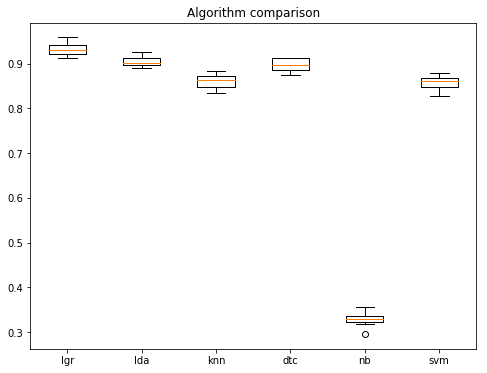

In [98]:
# Compare Algorithms
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax.boxplot(results)
ax.set_title("Algorithm comparison")
ax.set_xticklabels(names)
plt.show()

## 5. Improve results

### Machine learning models

In [100]:
# Tune scaled logistic regression
c_param = np.arange(0.1, 10, 0.2)
penalty = ["l1", "l2"]
param_grid = dict(C=c_param, penalty=penalty)
lgr = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=lgr, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print("Best {:.3f} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("{:.3f} +/- {:.3f} with {}".format(mean, stdev, param))

KeyboardInterrupt: 